# Data Pre-Processing

## Preliminaries

In [1]:
from datetime import datetime as dt
now = dt.now()
print ("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M:%S %p"))

Analysis on 2023-07-03 at 11:39:00 AM


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data

In [5]:
# Set the index using index_col= during import
df = pd.read_excel("/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/data/Copy of employee.xlsx", index_col = "Name")
df.head()

,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
Name,,,,,,,,
"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
"Wu, James",NaN,M,SALE,94494.58,low,1,62,74
"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
"Jones, Alissa",5.0,F,NaN,53772.58,NaN,1,65,62
"Downs, Deborah",7.0,F,FINC,57139.90,high,2,90,86


## Create Indicator/Dummy Variables

In [6]:
# Separate 'Gender' and 'JobSatcolumn into 'Gender M' and 'Gender F' columns.
df2 = pd.get_dummies(df, columns=["Gender", "JobSat"])
df2.head()


,Years,Dept,Salary,Plan,Pre,Post,Gender_F,Gender_M,JobSat_high,JobSat_low,JobSat_med
Name,,,,,,,,,,,
"Ritchie, Darnell",7.0,ADMN,53788.26,1,82,92,0,1,0,0,1
"Wu, James",NaN,SALE,94494.58,1,62,74,0,1,0,1,0
"Hoang, Binh",15.0,SALE,111074.86,3,96,97,0,1,0,1,0
"Jones, Alissa",5.0,NaN,53772.58,1,65,62,1,0,0,0,0
"Downs, Deborah",7.0,FINC,57139.90,2,90,86,1,0,1,0,0


## Missing Data

In [7]:
# View example of row missing data
df.iloc[1:2, 0:5] # 2nd row, columns 1-5

,Years,Gender,Dept,Salary,JobSat
Name,,,,,
"Wu, James",NaN,M,SALE,94494.58,low


In [8]:
# Count the number of NAs in the data frame and see where they are
# To produce two outputs you can use the print() function
print(df.isna().sum())
print('\nTotal Missing:', df.isna().sum().sum())

Years     1
Gender    0
Dept      1
Salary    0
JobSat    2
Plan      0
Pre       0
Post      0
dtype: int64

Total Missing: 4


Delete rows with missing data

In [9]:
df.shape

(37, 8)

In [10]:
df2 = df.dropna(axis='rows')
df2.shape

(34, 8)

In [20]:
# We now removed James Wu, Alissa Jones, and Jessica Korhalkar from the data frame
print(df2)
print('\nShape: ', df2.shape)

                     Years Gender  Dept     Salary JobSat  Plan  Pre  Post
Name                                                                      
Ritchie, Darnell       7.0      M  ADMN   53788.26    med     1   82    92
Hoang, Binh           15.0      M  SALE  111074.86    low     3   96    97
Downs, Deborah         7.0      F  FINC   57139.90   high     2   90    86
Afshari, Anbar         6.0      F  ADMN   69441.93   high     2  100   100
Knox, Michael         18.0      M  MKTG   99062.66    med     3   81    84
Campagna, Justin       8.0      M  SALE   72321.36    low     1   76    84
Kimball, Claire        8.0      F  MKTG   61356.69   high     2   93    92
Cooper, Lindsay        4.0      F  MKTG   56772.95   high     1   78    91
Saechao, Suzanne       8.0      F  SALE   55545.25    med     1   98   100
Pham, Scott           13.0      M  SALE   81871.05   high     2   90    94
Tian, Fang             9.0      F  ACCT   71084.02    med     2   60    61
Bellingar, Samantha   10.

Impute missing data

In [24]:
# Isolate predictor variables. Necessary for supervised machine learning
X = df.loc[:, ['Years', 'Salary', 'Pre', 'Post']] # create a list of columns to isolate
X.iloc[1,0] # view a cell with missing data

nan

In [26]:
print("is X a DataFrame?", isinstance(X, pd.DataFrame)) # checking to see if X is a DataFrame

is X a DataFrame? True


In [27]:
# Impute using the median
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
imp_med = imp_med.fit(X)
X = imp_med.transform(X)

In [28]:
print("is x a numpy array? ", isinstance(X, np.ndarray))

is x a numpy array?  True


In [29]:
# The missing value for James Wu is now 9.0, the value in the second row, first column
X[1,0]

9.0

## Discover Outliers

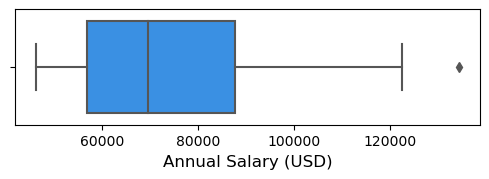

In [36]:
# Create a boxplot to represent a single continuous variable.
plt.figure(figsize=(6,1.5)) # adjust figure size
sns.boxplot(x=df['Salary'], color='dodgerblue') # set x-axis to Salary and color to dodger blue
plt.xlabel('Annual Salary (USD)', fontsize=12) # set x axis label
plt.show()

In [38]:
# Identify the outlier
print(df['Salary'].idxmax())
print(round(df['Salary'].loc[df['Salary'].idxmax()], 2))

Correll, Trevon
134419.23


## Transorm variables to same scales

In [39]:
from sklearn import preprocessing

## Min-Max Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

In [41]:
X = df[['Years', 'Salary', 'Pre']].copy()
X.loc[:, 'Pre'] = X.loc[:, 'Pre'].astype('float64')
X.head()

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_97733/3943620455.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Pre'] = X.loc[:, 'Pre'].astype('float64')


,Years,Salary,Pre
Name,,,
"Ritchie, Darnell",7.0,53788.26,82.0
"Wu, James",NaN,94494.58,62.0
"Hoang, Binh",15.0,111074.86,96.0
"Jones, Alissa",5.0,53772.58,65.0
"Downs, Deborah",7.0,57139.90,90.0


In [42]:
# Another way to check what type of data structure you are working with.
type(X)

pandas.core.frame.DataFrame

In [45]:
# Transform X into a numpy array
X = mm_scaler.fit_transform(X)

In [44]:
type(X)

numpy.ndarray

In [49]:
# View the new transformed data
Xd = pd.DataFrame(X, columns=['Years', 'Salary', 'Pre'])
Xd.head()

,Years,Salary,Pre
0,0.260870,0.086793,0.560976
1,NaN,0.547823,0.073171
2,0.608696,0.735607,0.902439
3,0.173913,0.086615,0.146341
4,0.260870,0.124753,0.756098


In [47]:
Xd.min()

Years     0.0
Salary    0.0
Pre       0.0
dtype: float64

In [48]:
Xd.max()

Years     1.0
Salary    1.0
Pre       1.0
dtype: float64

## Standardization Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
s_scaler = preprocessing.StandardScaler()

In [51]:
# store the variables to be standardized in X. Convert variable Pre from int to float
X = df[['Years', 'Salary', 'Pre']].copy()
X.loc[:, 'Pre'] = X.loc[:, 'Pre'].astype('float64')

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_97733/149963356.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Pre'] = X.loc[:, 'Pre'].astype('float64')


In [53]:
# Get the mean and standard deviation of each variable with the fit method.
X = s_scaler.fit_transform(X)

In [54]:
Xd = pd.DataFrame(X, columns=['Years', 'Salary', 'Pre'])
Xd.head()

,Years,Salary,Pre
0,-0.423301,-0.930445,0.270873
1,NaN,0.962614,-1.413548
2,0.994266,1.733685,1.449968
3,-0.777693,-0.931174,-1.160885
4,-0.423301,-0.774576,0.944642


In [55]:
round(Xd.mean(), 4)

Years    -0.0
Salary    0.0
Pre      -0.0
dtype: float64

In [56]:
round(Xd.std(), 4)

Years     1.0142
Salary    1.0138
Pre       1.0138
dtype: float64

In [57]:
Xd.min()

Years    -1.486477
Salary   -1.286829
Pre      -1.666212
dtype: float64

In [58]:
Xd.max()

Years     2.589029
Salary    2.819322
Pre       1.786853
dtype: float64

## Robust Scaling

In [59]:
from sklearn.preprocessing import RobustScaler
r_scaler = preprocessing.RobustScaler()

In [60]:
X = df[['Years', 'Salary', 'Pre']].copy()
X.loc[:, 'Pre'] = X.loc[:, 'Pre'].astype('Float64')

In [61]:
X = r_scaler.fit_transform(X)

In [62]:
Xd = pd.DataFrame(X, columns=['Years', 'Salary', 'Pre'])
Xd.head()

,Years,Salary,Pre
0,-0.25,-0.508160,0.10
1,NaN,0.804415,-0.90
2,0.75,1.339047,0.80
3,-0.50,-0.508666,-0.75
4,-0.25,-0.400086,0.50


In [66]:
round(Xd.mean(), 4)

Years     0.0486
Salary    0.1370
Pre      -0.0608
dtype: float64

In [67]:
round(Xd.min(), 4)

Years    -1.0000
Salary   -0.7553
Pre      -1.0500
dtype: float64

In [68]:
round(Xd.max(), 4)

Years     1.8750
Salary    2.0918
Pre       1.0000
dtype: float64

In [69]:
round(Xd.std(), 4)

Years     0.7154
Salary    0.7029
Pre       0.6019
dtype: float64

In [70]:
# Create dummy variable for 3 categorical levels
test = pd.read_excel("/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/data/Homework test file.xlsx")
test.head()

,Response
0,D
1,N
2,A
3,N
4,A


In [72]:
test = pd.get_dummies(test, columns=['Response'], drop_first=True)
test.head()

,Response_D,Response_N
0,1,0
1,0,1
2,0,0
3,0,1
4,0,0
